# **2017 Full-field Data, Treatment II**
***Objective:* produce a mask that will allow working with the lazurite particles only while ignoring contributions from the background**

## Treatment IIa:
***Objective:* produce a mean image from normalized full-field XANES spectral cubes**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- normalized full-field XANES spectral cubes, type = .hdf5, [dataset22] ()
> H020_norm.hdf <br> H415_norm.hdf <br> H750_norm.hdf <br> H020oilL4_norm.hdf <br> H750oilL4_norm.hdf

### Steps:
- follow script below

### Output:
- mean images, type = .png [dataset23] ()
> mean_value_H020_norm_date.png <br> 
mean_value_H415_norm_date.png <br> 
mean_value_H750_norm_date.png <br> 
mean_value_H020oilL4_norm_date.png <br> 
mean_value_H750oilL4_norm_date.png

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

In [1]:
%pylab inline
import os
import tables
import datetime
import matplotlib.pyplot as plt 

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
figsize(16, 16)

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('dataset_23')
except OSError:
    pass

Start here for each new file import...

In [4]:
##choose the normalized HDF5 file to import

#filename = 'H020_norm.hdf'          ##for room temperature (ie 20 C) sample
#filename = 'H415_norm.hdf'          ##for 415 C sample
#filename = 'H750_norm.hdf'          ##for 750 C sample
#filename = 'H020oilL4_norm.hdf'     ##for 750 C sample plus oil and artificial aging
filename = 'H750oilL4_norm.hdf'     ##for room temperature sample plus oil and artificial aging

##see other python sheet for 600 C sample

filename = os.path.join('dataset_22', filename)
h5 = tables.open_file(filename)

In [5]:
##preparation for saving
basename, ext = os.path.splitext(os.path.basename(filename))
basename, ext

('H750oilL4_norm', '.hdf')

In [6]:
##for all normalized files
data = h5.root.data[:] ##for normalized data, hdf
data.shape  ##want (energy, spatial 1, spatial 2)
#data.dtype

(140, 1420, 1720)

(1420, 1720)


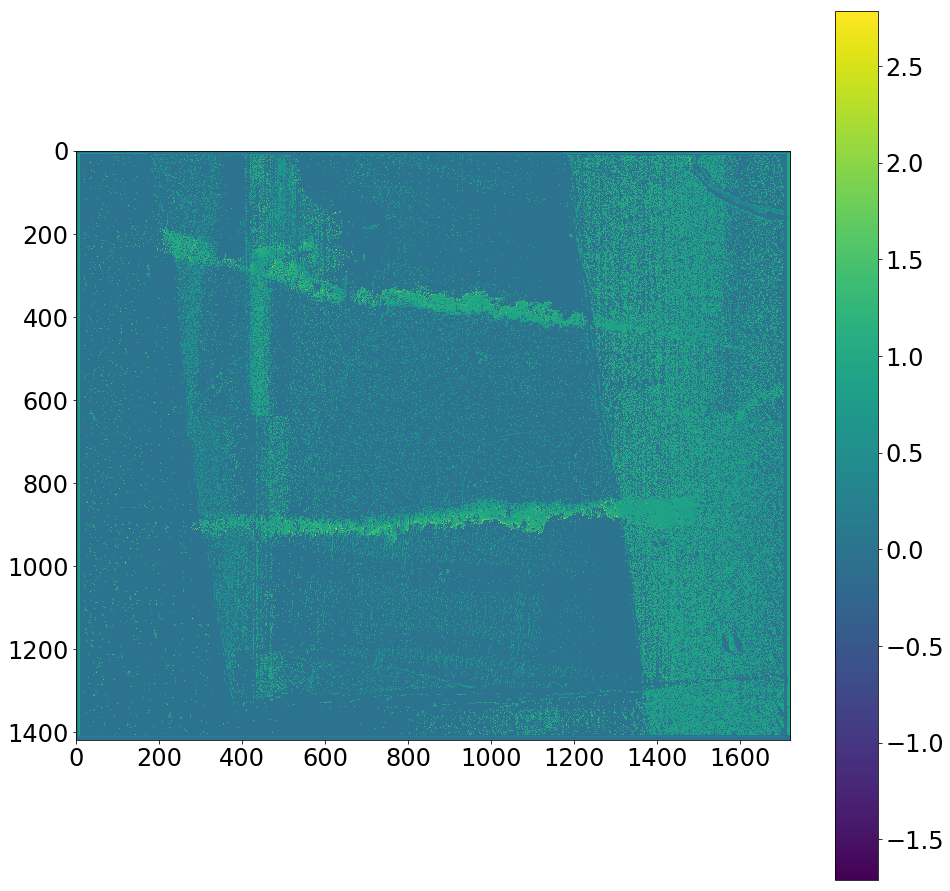

In [7]:
##calculates the mean intensity over all energies and displays as an image
mn = data.mean(axis=0)
print(mn.shape)
imshow(mn)
tmp = colorbar()

In [8]:
##the min and max mean intensity
np.nanmin(mn), np.nanmax(mn) ##to skip NaNs

(-1.7112108, 2.7867014)

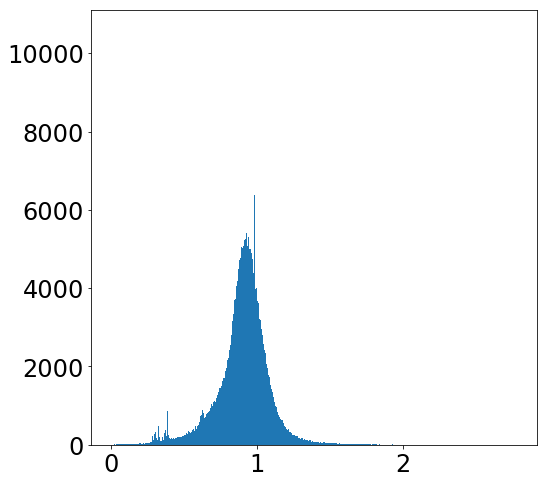

In [9]:
##making a histogram for all pixels
figsize(8, 8)
hmn = mn[~isnan(mn)]  ##select valid pixels
hmn = hmn[hmn>0]  ##select strictly positive pixels
tmp = hist(hmn, 1000)  ##plot histogram

In [10]:
##scale between 0 and 1
def normalize(arr):
    ret = ((arr - np.nanmin(arr))/(np.nanmax(arr)-np.nanmin(arr)))
    ret[np.isnan(arr)] = 0
    return ret

In [11]:
##preparation for 8-bit RGB image
colors = uint8(255 * cm.viridis(normalize(mn))[...,:3]) # ... means all rows and all columns, :3 means 'RGBA'[:3] -> RGB
#colors.shape
colors.max(axis=(0,1))

array([253, 231, 142], dtype=uint8)

In [12]:
##save mean image as a .png form which to create mask
savename = os.path.join('dataset_23', 'mean_value_' + basename + '_' + date + '.png')
print(savename)
imsave(savename, colors)

dataset_23/mean_value_H750oilL4_norm_20190702.png


### continue to sheet '04b_2017FF_Treatment-IIa...' for H-600 and '05_2017FF_Treatment-IIb...' for all